In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
ordinal_ridge = pd.read_csv('Ordinal+Ridge.csv')
ordinal_ridge.shape

(2580, 84)

In [3]:
X_ordinal = ordinal_ridge.drop(['SalePrice'], axis=1).values
Y_ordinal = ordinal_ridge.SalePrice.values

In [4]:
X_ordinal.shape

(2580, 83)

In [5]:
len(Y_ordinal)

2580

In [6]:
X_ordinal.shape[1]

83

In [7]:
AR2_Ordinal = []
MAE_Ordinal = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_ordinal,Y_ordinal,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    xgb = XGBRegressor()
    xgb.fit(X_train_scaled, Y_train)
    
    pred = xgb.predict(X_test_scaled)
    
    XGB_Score = xgb.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1 - XGB_Score) * (len(Y_ordinal)-1)/(len(Y_ordinal)-X_ordinal.shape[1]-1)
    AR2_Ordinal.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Ordinal.append(mae)

In [8]:
Ordinal = pd.DataFrame({'AR2_Ordinal': AR2_Ordinal, 'MAE_Ordinal': MAE_Ordinal})
Ordinal

,AR2_Ordinal,MAE_Ordinal
0,0.946266,12145.342599
1,0.940166,12162.474098
2,0.890387,12209.248047
3,0.943831,11483.856250
4,0.885058,11782.507819
5,0.946104,11777.863015
6,0.946952,12226.273014
7,0.890538,12295.794138
8,0.925531,12128.664062
9,0.943440,12372.942045


In [9]:
Ordinal.describe()

,AR2_Ordinal,MAE_Ordinal
count,100.000000,100.000000
mean,0.929174,12085.452771
std,0.021792,512.328515
min,0.876831,10732.498238
25%,0.914872,11727.109828
50%,0.937899,12107.284796
75%,0.945222,12411.714503
max,0.957165,13288.451078


In [10]:
ord_ridge_drop1 = pd.read_csv('Ordinal+Ridge_Drop1.csv')
ord_ridge_drop1.shape

(2579, 84)

In [11]:
X_ord_drop1 = ord_ridge_drop1.drop(['SalePrice'], axis=1).values
Y_ord_drop1 = ord_ridge_drop1.SalePrice.values

In [12]:
X_ord_drop1.shape

(2579, 83)

In [13]:
len(Y_ord_drop1)

2579

In [14]:
X_ord_drop1.shape[1]

83

In [15]:
AR2_Drop1 = []
MAE_Drop1 = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_ord_drop1,Y_ord_drop1,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    xgb = XGBRegressor()
    xgb.fit(X_train_scaled, Y_train)
    
    pred = xgb.predict(X_test_scaled)
    
    XGB_Score = xgb.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1 - XGB_Score) * (len(Y_ord_drop1)-1)/(len(Y_ord_drop1)-X_ord_drop1.shape[1]-1)
    AR2_Drop1.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Drop1.append(mae)

In [16]:
OrdinalDrop1 = pd.DataFrame({'AR2_Drop1': AR2_Drop1, 'MAE_Drop1': MAE_Drop1})
OrdinalDrop1

,AR2_Drop1,MAE_Drop1
0,0.935838,12481.711089
1,0.946808,11400.246578
2,0.948484,11840.394998
3,0.948740,11258.512555
4,0.940874,11602.100400
5,0.932252,12490.169325
6,0.946797,11687.361501
7,0.946783,11866.101647
8,0.941364,11432.685314
9,0.942969,12213.638639


In [17]:
OrdinalDrop1.describe()

,AR2_Drop1,MAE_Drop1
count,100.000000,100.000000
mean,0.941494,11952.711642
std,0.006511,431.182703
min,0.918049,11058.870228
25%,0.937692,11636.685453
50%,0.941956,11920.227716
75%,0.946489,12221.080210
max,0.952861,12929.964741


In [18]:
ord_ridge_dropIF = pd.read_csv('Ordinal+Ridge_DropIF.csv')
ord_ridge_dropIF.shape

(2568, 84)

In [19]:
X3 = ord_ridge_dropIF.drop(['SalePrice'], axis=1).values
Y3 = ord_ridge_dropIF.SalePrice.values

In [20]:
X3.shape

(2568, 83)

In [21]:
len(Y3)

2568

In [22]:
X3.shape[1]

83

In [23]:
AR2_DropIF = []
MAE_DropIF = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X3,Y3,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    xgb = XGBRegressor()
    xgb.fit(X_train_scaled, Y_train)
    
    pred = xgb.predict(X_test_scaled)
    
    XGB_Score = xgb.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1 - XGB_Score) * (len(Y3)-1)/(len(Y3)-X3.shape[1]-1)
    AR2_DropIF.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_DropIF.append(mae)

In [24]:
OrdinalDropIF = pd.DataFrame({'AR2_DropIF': AR2_DropIF, 'MAE_DropIF': MAE_DropIF})
OrdinalDropIF

,AR2_DropIF,MAE_DropIF
0,0.954246,11840.568648
1,0.938735,12254.163588
2,0.947521,11775.807279
3,0.946391,11774.028062
4,0.935485,12252.752020
5,0.938997,11866.137857
6,0.929713,12583.598967
7,0.951896,10980.754186
8,0.950510,11229.903488
9,0.936055,12155.240922


In [25]:
OrdinalDropIF.describe()

,AR2_DropIF,MAE_DropIF
count,100.000000,100.000000
mean,0.943515,11852.333214
std,0.005837,455.880843
min,0.929713,10654.663865
25%,0.939802,11539.614351
50%,0.944426,11852.574920
75%,0.948046,12176.410879
max,0.954246,13244.762126


In [26]:
box = pd.concat([Ordinal, OrdinalDrop1, OrdinalDropIF], axis=1)
box

,AR2_Ordinal,MAE_Ordinal,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
0,0.946266,12145.342599,0.935838,12481.711089,0.954246,11840.568648
1,0.940166,12162.474098,0.946808,11400.246578,0.938735,12254.163588
2,0.890387,12209.248047,0.948484,11840.394998,0.947521,11775.807279
3,0.943831,11483.856250,0.948740,11258.512555,0.946391,11774.028062
4,0.885058,11782.507819,0.940874,11602.100400,0.935485,12252.752020
5,0.946104,11777.863015,0.932252,12490.169325,0.938997,11866.137857
6,0.946952,12226.273014,0.946797,11687.361501,0.929713,12583.598967
7,0.890538,12295.794138,0.946783,11866.101647,0.951896,10980.754186
8,0.925531,12128.664062,0.941364,11432.685314,0.950510,11229.903488
9,0.943440,12372.942045,0.942969,12213.638639,0.936055,12155.240922


In [27]:
box.describe()

,AR2_Ordinal,MAE_Ordinal,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.929174,12085.452771,0.941494,11952.711642,0.943515,11852.333214
std,0.021792,512.328515,0.006511,431.182703,0.005837,455.880843
min,0.876831,10732.498238,0.918049,11058.870228,0.929713,10654.663865
25%,0.914872,11727.109828,0.937692,11636.685453,0.939802,11539.614351
50%,0.937899,12107.284796,0.941956,11920.227716,0.944426,11852.574920
75%,0.945222,12411.714503,0.946489,12221.080210,0.948046,12176.410879
max,0.957165,13288.451078,0.952861,12929.964741,0.954246,13244.762126


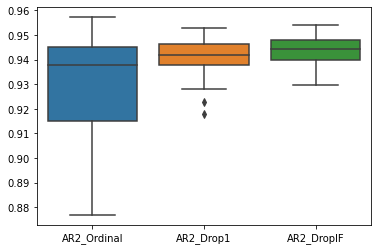

In [28]:
sns.boxplot(data=box[['AR2_Ordinal','AR2_Drop1','AR2_DropIF']]);

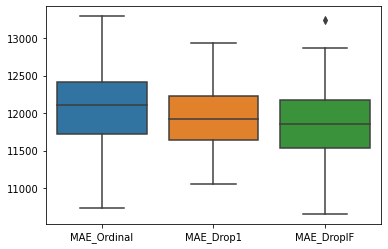

In [29]:
sns.boxplot(data=box[['MAE_Ordinal','MAE_Drop1','MAE_DropIF']]);